# Analysing WRF output example
We will use the wrf output for one day, namely 07-01-2015. We will read the data, check which variables are in the file, try to make some time series, and plot the data.

## Reading the data and make timeseries plot

In [41]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from netCDF4 import Dataset,num2date

#Don't use this command in the terminal!!!
%matplotlib notebook 


# Make the file object
wrfout = Dataset('wrfout_d03_2015-07-01_00:00:00')

# Show which variables are in the file
for x in wrfout.variables:
    print x

Times
U
V
W
PH
PHB
T
P
PB
P_HYD
Q2
T2
TH2
PSFC
U10
V10
XTIME
QVAPOR
QCLOUD
QRAIN
TSLB
SMOIS
GRDFLX
SNOW
SNOWH
SSTSK
QKE
TKE_PBL
EL_PBL
MAPFAC_UX
MAPFAC_UY
HGT
TSK
RAINNC
SNOWNC
GRAUPELNC
HAILNC
CLDFRA
SWDOWN
GLW
SWNORM
OLR
ALBEDO
EMISS
NOAHRES
UST
PBLH
HFX
QFX
LH
SNOWC
SR
SST


In [42]:
# Inspect time array in more detail
wrfout.variables['XTIME']

<type 'netCDF4._netCDF4.Variable'>
float32 XTIME(Time)
    FieldType: 104
    MemoryOrder: 0  
    description: minutes since 2015-06-25 00:00:00
    units: minutes since 2015-06-25 00:00:00
    stagger: 
unlimited dimensions: Time
current shape = (24,)
filling off

In [43]:
# Extract time data from wrfout object
wrftime = wrfout.variables['XTIME'][:]
print wrftime

[  8640.   8700.   8760.   8820.   8880.   8940.   9000.   9060.   9120.
   9180.   9240.   9300.   9360.   9420.   9480.   9540.   9600.   9660.
   9720.   9780.   9840.   9900.   9960.  10020.]


In [44]:
# Convert time to datetime format:
timeunits = wrfout.variables['XTIME'].units
time = num2date(wrftime,units=timeunits,calendar='standard')
print time

[datetime.datetime(2015, 7, 1, 0, 0) datetime.datetime(2015, 7, 1, 1, 0)
 datetime.datetime(2015, 7, 1, 2, 0) datetime.datetime(2015, 7, 1, 3, 0)
 datetime.datetime(2015, 7, 1, 4, 0) datetime.datetime(2015, 7, 1, 5, 0)
 datetime.datetime(2015, 7, 1, 6, 0) datetime.datetime(2015, 7, 1, 7, 0)
 datetime.datetime(2015, 7, 1, 8, 0) datetime.datetime(2015, 7, 1, 9, 0)
 datetime.datetime(2015, 7, 1, 10, 0) datetime.datetime(2015, 7, 1, 11, 0)
 datetime.datetime(2015, 7, 1, 12, 0) datetime.datetime(2015, 7, 1, 13, 0)
 datetime.datetime(2015, 7, 1, 14, 0) datetime.datetime(2015, 7, 1, 15, 0)
 datetime.datetime(2015, 7, 1, 16, 0) datetime.datetime(2015, 7, 1, 17, 0)
 datetime.datetime(2015, 7, 1, 18, 0) datetime.datetime(2015, 7, 1, 19, 0)
 datetime.datetime(2015, 7, 1, 20, 0) datetime.datetime(2015, 7, 1, 21, 0)
 datetime.datetime(2015, 7, 1, 22, 0) datetime.datetime(2015, 7, 1, 23, 0)]


In [45]:
# Import other variables, e.g. Temperature
# let's inspect the variable first
print wrfout.variables['T']

<type 'netCDF4._netCDF4.Variable'>
float32 T(Time, bottom_top, south_north, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    description: perturbation potential temperature (theta-t0)
    units: K
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (24, 39, 201, 201)
filling off



We can see that temperature has 4 dimensions. Also, the order in which the data is stored along the dimensions is given. We could just import the full matrix and check that it has indeed four dimensions as follows:

In [46]:
wrfT = wrfout.variables['T'][:]
wrfT.shape

(24, 39, 201, 201)

Now, since we are interested in plotting a time series, we need only one point in space, so we need to limit x,y and z, while keeping all the time units. Let's assume, for now, that our point of interest is x=100, y=100, z=0. That is, a point in more or less the middle of the domain, near the surface. Note that we strictly follow the order of the dimensions as it is given in the variable description

In [47]:
wrfT = wrfout.variables['T'][:,0,100,100]
print wrfT.shape
print wrfT

(24,)
[-13.25781155 -13.25263882 -13.24032211 -13.39459515 -13.47680187
 -13.59323025 -13.6786747  -13.72670937 -13.72151375 -13.48870277
 -13.28540421 -13.01741314 -12.58317089 -12.16792202 -11.94770718
 -11.79158592 -11.6240406  -11.64165592 -11.44226551 -11.11795044
 -10.88765812 -10.86215973 -10.82411957 -10.93723869]


It is important to try to minimize the amount of data that is actively loaded into memory. Therefore, it is way better to import only one temperature point than the complete 4-dimensional array. If you put to much data in memory, python may become very slow and even crash. Recall that the units of T were K, and now we find values of -13. This is clearly not possible. That is, because T is actually a perturbation temperature, and from the [wrf user guide](http://www2.mmm.ucar.edu/wrf/users/docs/user_guide_V3/users_guide_chap5.htm#special_fields), we need to add 300K to it to find actual temperature values. 

In [58]:
temp = wrfT+300.
print temp

[ 286.7421875   286.74737549  286.75967407  286.60540771  286.52319336
  286.4067688   286.32131958  286.27328491  286.2784729   286.5112915
  286.71459961  286.98257446  287.4168396   287.83209229  288.05230713
  288.20840454  288.37594604  288.3583374   288.55773926  288.88204956
  289.11233521  289.1378479   289.1758728   289.06277466]


Now that we've successfully imported the temperature and time, let's make a plot of the time series

<IPython.core.display.Javascript object>


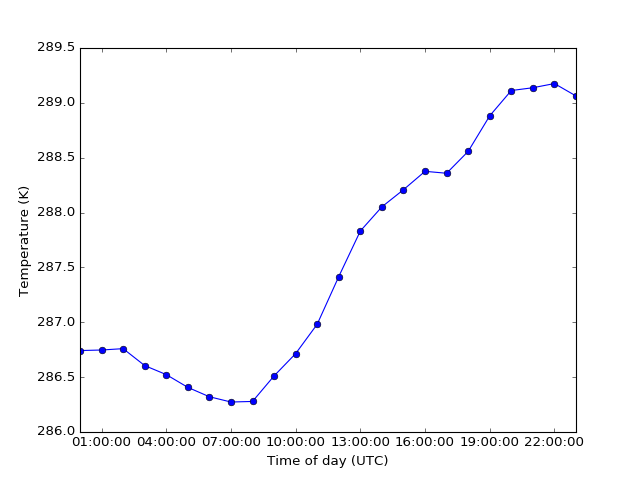

In [59]:
# Make the figure instance
fig,ax = plt.subplots()

# Plot the data
ax.plot(time,temp,'-o')

# Some aestethics
ax.set_xlabel('Time of day (UTC)')
ax.set_ylabel('Temperature (K)')

plt.show()

# Vertical profiles
Now let's take one point in time and look at the vertical profile of temperature. To make sense of the data, we will also need information on the height of each level. From the [wrf user guide](http://www2.mmm.ucar.edu/wrf/users/docs/user_guide_V3/users_guide_chap5.htm#special_fields), the total geopotential height can be calculated as (PH+PHB)/9.81

In [68]:
ph = wrfout.variables['PH'][12,:,100,100]
phb = wrfout.variables['PHB'][12,:,100,100]
altitude = (ph+phb)/9.81
print altitude

[  0.00000000e+00   2.03249874e+01   5.09147987e+01   9.60664368e+01
   1.59301743e+02   2.43481583e+02   3.51020203e+02   4.83953949e+02
   6.43782043e+02   8.31667603e+02   1.04859668e+03   1.29568494e+03
   1.57462292e+03   1.88676111e+03   2.23218555e+03   2.61027124e+03
   3.02038452e+03   3.46211475e+03   3.93516724e+03   4.43895215e+03
   4.97257080e+03   5.53574512e+03   6.12787598e+03   6.74680566e+03
   7.39114404e+03   8.05964844e+03   8.75234375e+03   9.47075684e+03
   1.02171729e+04   1.09911943e+04   1.17954541e+04   1.26370195e+04
   1.35205205e+04   1.44479512e+04   1.54178477e+04   1.64386035e+04
   1.75231055e+04   1.86855664e+04   1.99325098e+04   2.11353984e+04]


In [75]:
temp = wrfout.variables['T'][12,:,100,100]+300

In [78]:
print altitude.shape
print temp.shape

(40,)
(39,)


Note that the altitude array also contains a value for the ground level, whereas the temperature does array does not. Therefore, in plotting, we need to use only the last 39 values of the altitude array.

<IPython.core.display.Javascript object>


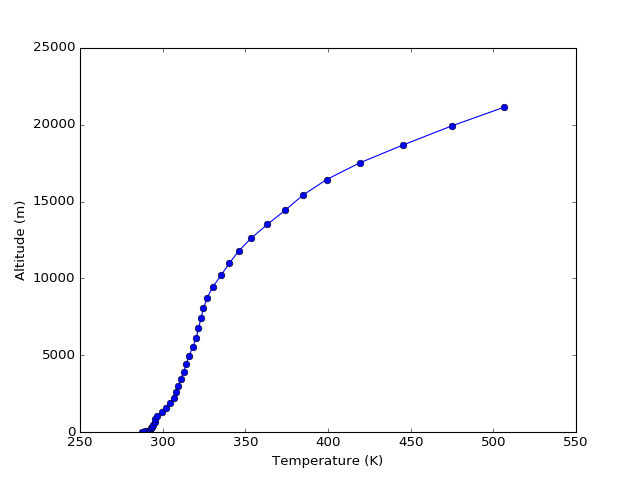

In [79]:
# Make the figure instance
fig,ax = plt.subplots()

# Plot the data
ax.plot(temp,altitude[1:],'-o')

# Some aestethics
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Altitude (m)')

# To limit the vertical extent uncomment the following line
#ax.set_ylim(0,3000)
plt.show()

# 2D plots in time and height
Now, let's combine the two previous formats. I will repeat some of the previous load statements in order to enable standalone execution of the code below.

In [164]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from netCDF4 import Dataset,num2date

#Don't use this command in the terminal!!!
%matplotlib notebook 


# Make the file object
wrfout = Dataset('wrfout_d03_2015-07-01_00:00:00')

# Load wrf time
wrftime = wrfout.variables['XTIME'][:]
timeunits = wrfout.variables['XTIME'].units
time = num2date(wrftime,units=timeunits,calendar='standard')

# Load wrf altitude
ph = wrfout.variables['PH'][:,1:,100,100] # Notice that we have now changed the vertical extent to exclude the surface
phb = wrfout.variables['PHB'][:,1:,100,100] 
altitude = (ph+phb)/9.81

# Load wrf temperature
wrfT = wrfout.variables['T'][:,:,100,100]
temp = wrfT+300.

print time.shape
print altitude.shape
print temp.shape

(24,)
(24, 39)
(24, 39)


In [165]:
# Make time array 2d as well
twodimtime = np.tile(time, (39,1)).transpose()
print twodimtime.shape

(24, 39)


Now, we have the correct shape for the date array. Note that this whole step would not have been necessary if the altitude would be constant. However, the altitude of pressure levels can change in time, and thus we will keep both dimensions. Since altitude is passed as 2d array, time needs to be 2d as well for consistency. 

There is one more problem with the datetime array. Matplotlib doesn't understand this format for 2d plots. Therefore, we need to do a workaround

<IPython.core.display.Javascript object>


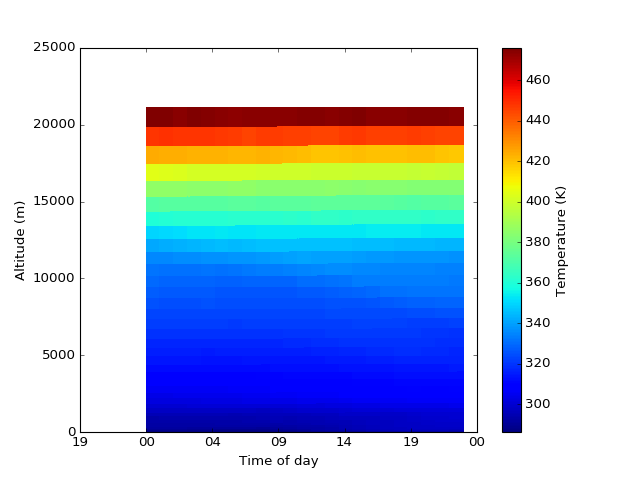

In [166]:
# Extra steps for workaround
import matplotlib.dates as mdates
xtime = mdates.date2num(twodimtime)

# Plot data
fig,ax = plt.subplots()
cp = ax.pcolormesh(xtime,altitude,temp) #sometimes it is usefull to name the plot object, in this case we name it cp

# Alternatively, to make a countourplot or to adjust the temperature color range, use:
#cp = ax.pcolormesh(xtime,altitude,temp,vmin=270,vmax=300)
#cp = ax.contourf(xtime,altitude,temp)

# Some aestethics
ax.set_xlabel('Time of day')
ax.set_ylabel('Altitude (m)')

# More extra steps for the workaround
date_format = mdates.DateFormatter('%H')
ax.xaxis.set_major_formatter(date_format)

# To limit the vertical extent uncomment the following line
#ax.set_ylim(0,2000)
# to also adjust the colour range, insert vmin=270, vmax=300, see alternative

# Add colorbar
cb = plt.colorbar(cp) # this is why we needed to name the plot, and likewise we need to name the colorbar
cb.set_label('Temperature (K)') 

plt.show()

# Two-dimensional surface plots
Finally, we would like to plot some data on the surface. We will use the basemap package for this. To save output file size, I turned off the output of the latitude-longitude grid by default. Instead, I read the lat-lon values from the wrfinput file. 

In [224]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset,num2date
from mpl_toolkits.basemap import Basemap
#Don't use this command in the terminal!!!
%matplotlib notebook 

# Make the file object
wrfin = Dataset('wrfinput_d03')
wrfout = Dataset('wrfout_d03_2015-07-01_00:00:00')

wrflongitude = wrfin.variables['XLONG'][:]
wrflatitude = wrfin.variables['XLAT'][:]

# Load wrf 2m temperature (this is a seperate variable)
# Use fixed time and surface level
temp2m = wrfout.variables['T2'][12,:,:]

print wrflongitude.shape
print wrflatitude.shape
print temp2m.shape


(1, 201, 201)
(1, 201, 201)
(201, 201)


In [225]:
# To get rid of the extra dimension in the grid (which contains only 1 record), use numpy.squeeze
longitude =  wrflongitude.squeeze()
latitude =  wrflatitude.squeeze()

print longitude.shape

(201, 201)


Now, we're going to create the basemap instance. This requires a number of properties to be set correctly. We have a grid of 201x201 points and a grid spacing of 3 km, so width and height (to be specified in m) can be calculated easily. Resolution can be changed, l is for low and is quicker, change to h for high or f for full, for example. Reference latitudes are for the orientation of the grid, and I have used the same values here as I prescribed in the wrf namelist. The same goes for center lat and lon, they specify the center of the domain. LCC is the lambert conformal projection, it is a map projection suitable for mid-latitudes and also, it is the same as in wrf.

Using etopo gives a better map, but unfortunately this doesn't work on the hpc cluster of WUR (yet).

<IPython.core.display.Javascript object>


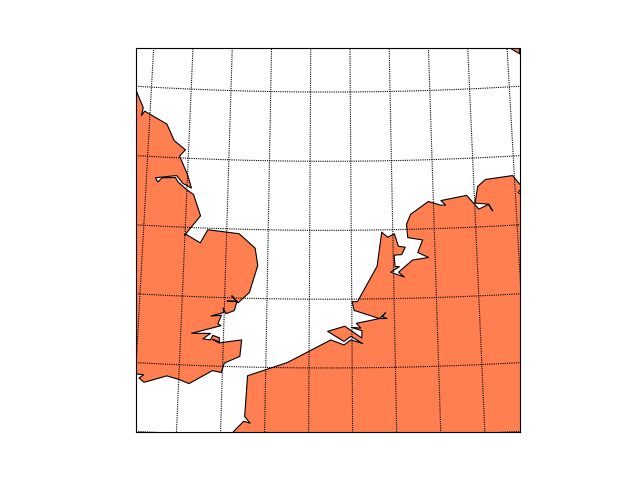

In [226]:
# Create figure instance
fig,ax=plt.subplots()

# Create basemap instance
m = Basemap(width=201*3000,height=201*3000,\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=30.,lat_2=60.,
            lat_0=52.86,lon_0=3.44,ax=ax)

m.drawcoastlines()

# Fill background
m.fillcontinents(color='coral',lake_color='aqua')
#m.etopo() # requires PIL, not on hpc
    
# Draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,1.))
m.drawmeridians(np.arange(-180.,181.,1.))

# See what it looks like
plt.show()

Now, we're going to project our data on the map. For this, we need to convert our longitude and latitude points (in decimal degrees) to figure coordinates (in m). 

<IPython.core.display.Javascript object>


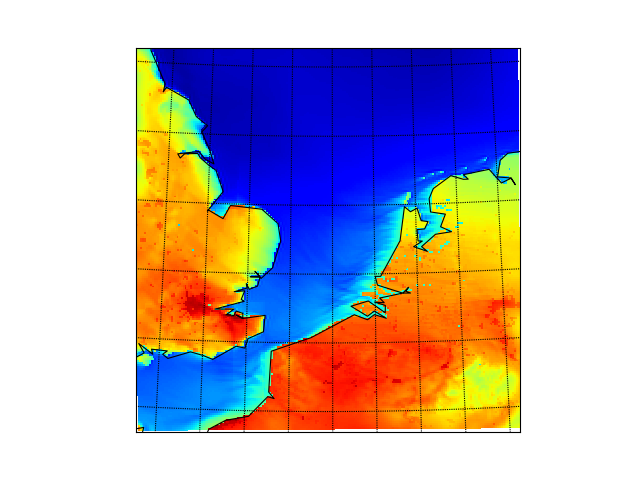

In [233]:
# Lets put the basemap on a figure instance
fig, ax = plt.subplots()

# Let's use mean lat and lon as reference point
reflat = latitude.mean()
reflon = longitude.mean()

# Create basemap instance again, because we already used plt.show()
m = Basemap(width=201*3000,height=201*3000,\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=30.,lat_2=60.,
            lat_0=reflat,lon_0=reflon,ax=ax)

# Convert lat/lon to map coordinates
x,y = m(longitude,latitude)

# Plot the data
m.pcolormesh(x,y,temp2m)

# Some orientation lines
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,1.)) 
m.drawmeridians(np.arange(-180.,181.,1.))

# Show the figure
plt.show()

# Wind vectors
Let's overlay the wind speed as well, we can do this with quiver (or streamplot)

<IPython.core.display.Javascript object>


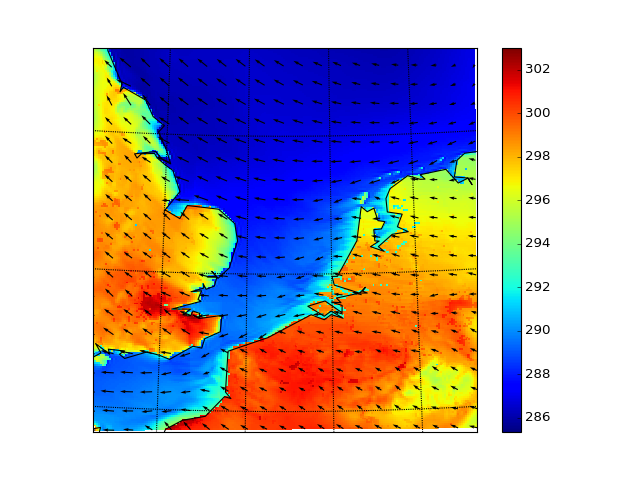

In [236]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset,num2date
from mpl_toolkits.basemap import Basemap
#Don't use this command in the terminal!!!
%matplotlib notebook 

timestep = 12

# Make the file object
wrfin = Dataset('wrfinput_d03')
wrfout = Dataset('wrfout_d03_2015-07-01_00:00:00')

wrflongitude = wrfin.variables['XLONG'][:]
wrflatitude = wrfin.variables['XLAT'][:]

# To get rid of the extra dimension in the grid (which contains only 1 record), use numpy.squeeze
longitude =  wrflongitude.squeeze()
latitude =  wrflatitude.squeeze()

# Load wrf 2m temperature (this is a seperate variable) and 10 m wind
# Use fixed time and surface level
temp2m = wrfout.variables['T2'][timestep,:,:]
u10 = wrfout.variables['U10'][timestep,:,:]
v10 = wrfout.variables['V10'][timestep,:,:]

# Lets put the basemap on a figure instance
fig, ax = plt.subplots()

# Let's use mean lat and lon as reference point
reflat = latitude.mean()
reflon = longitude.mean()

# Create basemap instance again, because we already used plt.show()
m = Basemap(width=201*3000,height=201*3000,\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=30.,lat_2=60.,
            lat_0=reflat,lon_0=reflon,ax=ax)

# Convert lat/lon to map coordinates
x,y = m(longitude,latitude)

# Plot the data for 2m temperature
t2mplot = m.pcolormesh(x,y,temp2m)

# For the quiver arrows, we don't want every singly point to be plotted, because then we get 201x201 arrows.
# Therefore, use a smart resample method:
skip=(slice(None,None,10),slice(None,None,10))
m.quiver(x[skip],y[skip],u10[skip],v10[skip])
# Now, every 10th point in both directions is plotted.

# Some orientation lines
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,2.)) 
m.drawmeridians(np.arange(-180.,181.,2.))

plt.colorbar(t2mplot)
# Show the figure
plt.show()

**Note**: for 10m wind, the wrfoutput has been automatically regridded to center points. For other levels of wind, they are defined at the cell boundaries. Therefore, U and V have different shapes, and some more advanced resampling is needed before plotting, as shown below

In [237]:
# Need to resample the u and v values so that they coincide on the grid
#
#   --v-- --v-- 
#  |     |     |
#  u  q  u  q  u
#  |     |     |
#   --v-- --v--
#  |     |     |
#  u  q  u  q  u
#  |     |     |
#   --v-- --v--
#
# We want to evaluate v and u simulatenously at the latitude and longitude of q
# u is oversampled in the x-direction (axis = 1)
# v is oversampled in the y-direction (axis = 0)

# These functions should do the trick, but only for 2d arrays!!
def resampleU(inputarray):
    i,j = inputarray.shape #works only for 2d arrays!
    output = np.zeros((i,j-1))
    for a in range(j-1):
        output[:,a] = (inputarray[:,a]+inputarray[:,a+1])/2.
    return output

def resampleV(inputarray):
    i,j = inputarray.shape #works only for 2d arrays!
    output = np.zeros((i-1,j))
    for a in range(i-1):
        output[a,:] = (inputarray[a,:]+inputarray[a+1,:])/2.
    return output

u_center = resampleU(uwrf)
v_center = resampleV(vwrf)

# How to find your gridpoint
In the above examples for timeseries and vertical profiles, I've just taken a random grid point. Let's say we want the gridpoint belonging to the coordinates of Cabauw: 51.971N 4.925E. Then we could use the following code:

In [324]:
def findpoint(gridlons,gridlats,point):
    ''' Return the index of the grid point nearest to a given point
        gridlons and gridlats should be 2d meshgrid arrays
        point is a tuple with (lon,lat)'''
    # First, convert long and lat arrays to flat arrays with ravel
    # Then, zip the two to get an array with tuples for each point on the grid
    grid = zip(gridlons.ravel(),gridlats.ravel())
    
    # The euclidean distance can be computed with linalg.norm 
    euclidean = lambda a,b: np.linalg.norm(np.array(a)-np.array(b))
    
    # Compute the euclidian distance between each grid point and the query point
    dist = np.asarray([euclidean(cell,point) for cell in grid])
    
    # Find the minimum of the euclidian distances array and return its index
    # Use np.unravel_index to transform back to 2d index instead of the flattened array
    ind = np.unravel_index(dist.argmin(),gridlons.shape)
    
    return ind,longitude[ind],latitude[ind]

index,ilat,ilon = findpoint(longitude,latitude,(4.971,51.971))
print 'Index:',index
print 'Coordinates:',(ilat,ilon)
    

Index: (80, 146)
Coordinates: (4.9724426, 51.963196)
